# Run All

## Import dan Load

Import library yang dibutuhkan

In [114]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
import warnings

from scipy.fft import fft, fftfreq
from scipy.signal import filtfilt
from scipy import stats
import scipy

Mengganti Style

In [115]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])
warnings.filterwarnings("ignore")

In [116]:
df_jalan = pd.read_excel('https://drive.google.com/uc?id=13rLxAPa4M0IWrC1xqjbNWALmKd3gY6LL')

## Preprocessing

Mengubah nama kolom

In [117]:
df_jalan.rename(columns={'Time (s)':'Time', 'Linear Acceleration x (m/s^2)':'SumbuX','Linear Acceleration y (m/s^2)':'SumbuY', 'Linear Acceleration z (m/s^2)' : 'SumbuZ'}, inplace=True)
df_jalan.head(3)

,Time,SumbuX,SumbuY,SumbuZ
0,0.057713,0.014520,-0.030124,0.038652
1,0.072605,-0.008532,-0.008645,0.011974
2,0.087559,-0.001474,0.016658,0.028989


Menolkan sinyal sumbu Y

In [118]:
df_jalan['SumbuZ'] = df_jalan['SumbuZ'] - (df_jalan['SumbuZ'].sum() / df_jalan['SumbuZ'].shape[0])
df_jalan['SumbuY'] = df_jalan['SumbuY'] - (df_jalan['SumbuY'].sum() / df_jalan['SumbuY'].shape[0])
df_jalan['SumbuX'] = df_jalan['SumbuX'] - (df_jalan['SumbuX'].sum() / df_jalan['SumbuX'].shape[0])
df_jalan.head(3)

,Time,SumbuX,SumbuY,SumbuZ
0,0.057713,0.014465,-0.030319,0.038544
1,0.072605,-0.008588,-0.008840,0.011865
2,0.087559,-0.001530,0.016463,0.028880


## Milestone 1

### Visualisasi (Soal Nomor 1)

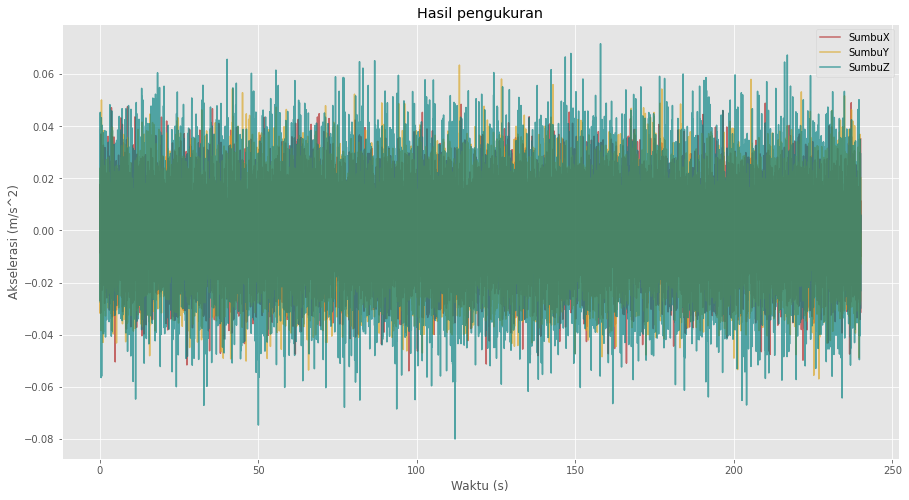

In [119]:
df_jalan.plot(x='Time', alpha=0.65, color=['firebrick', 'goldenrod', 'teal'])
plt.title("Hasil pengukuran")
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

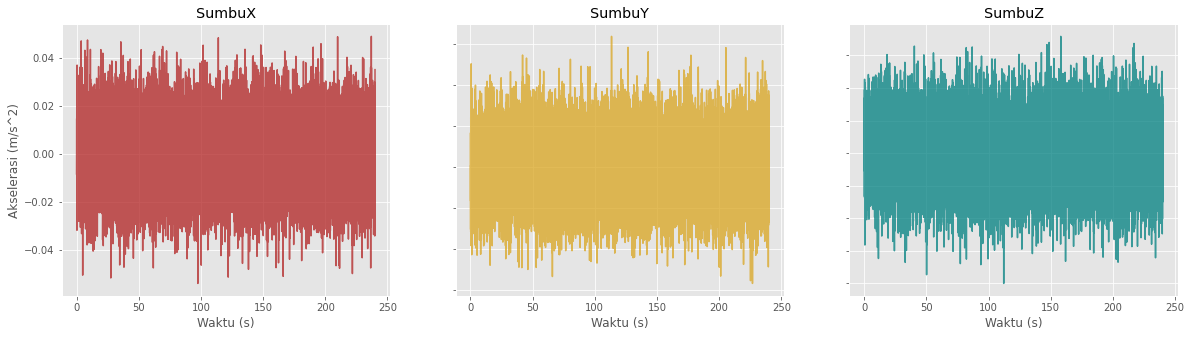

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(df_jalan['Time'], df_jalan['SumbuX'], color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(df_jalan['Time'], df_jalan['SumbuY'], color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(df_jalan['Time'], df_jalan['SumbuZ'], color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Waktu (s)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

### Sumbu Dominan (Soal Nomor 3)

In [121]:
df_jalan.describe()

,Time,SumbuX,SumbuY,SumbuZ
count,16084.000000,1.608400e+04,1.608400e+04,1.608400e+04
mean,120.031186,-1.911173e-19,-4.645810e-20,-2.408919e-19
std,69.274905,1.399827e-02,1.517950e-02,1.930380e-02
min,0.057713,-5.392940e-02,-5.698689e-02,-8.010216e-02
25%,60.042470,-9.389974e-03,-1.026513e-02,-1.306625e-02
50%,120.029900,1.065587e-04,4.474263e-05,-2.300322e-04
75%,180.019274,9.473250e-03,1.011197e-02,1.284651e-02
max,240.009787,4.901828e-02,6.349317e-02,7.170753e-02


Sumbu Z yang paling dominan saat kendaraan lewat, karena memiliki nilai minimal dan maksimal yang paling rendah/tinggi

## Milestone 2

### Tabel Pengamatan

In [122]:
df_kendaraan = pd.read_excel('https://drive.google.com/uc?id=1Sz0iPSLLnbOLRPi-RPVhlF6p80AFVF6z')
df_kendaraan.head()

,Time,Kendaraan
0,0.00,Motor
1,3.33,Motor
2,5.07,Motor
3,9.80,Motor
4,10.27,Motor


In [123]:
df_kendaraan.groupby('Kendaraan').count()

,Time
Kendaraan,
Mobil,19
Motor,112
Truk,1


### FFT (Soal Nomor 1)

In [124]:
N = df_jalan.shape[0]
freq = N/240
bagi_dua = N // 2

yf_sumbuX = fft(np.array(df_jalan['SumbuX']))[:bagi_dua]
xf_sumbuX = fftfreq(N, 1 / freq)[:bagi_dua]

yf_sumbuY = fft(np.array(df_jalan['SumbuY']))[:bagi_dua]
xf_sumbuY = fftfreq(N, 1 / freq)[:bagi_dua]

yf_sumbuZ = fft(np.array(df_jalan['SumbuZ']))[:bagi_dua]
xf_sumbuZ = fftfreq(N, 1 / freq)[:bagi_dua]


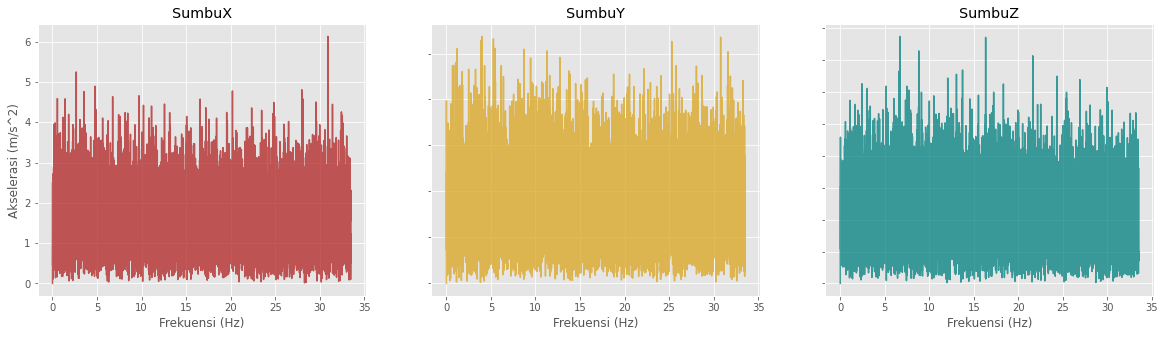

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(xf_sumbuX, np.abs(yf_sumbuX), color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(xf_sumbuY, np.abs(yf_sumbuY), color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(xf_sumbuZ, np.abs(yf_sumbuZ), color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Frekuensi (Hz)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

In [126]:
#Band-pass filter
fs = 240.0
lowcut = 2.0
highcut = 5.0

nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

order = 2

b, a = scipy.signal.butter(order, [low, high], 'bandpass', analog=False)
z_ybpf = scipy.signal.filtfilt(b, a, yf_sumbuZ, axis=0)
x_ybpf = scipy.signal.filtfilt(b, a, yf_sumbuX, axis=0)
y_ybpf = scipy.signal.filtfilt(b, a, yf_sumbuY, axis=0)

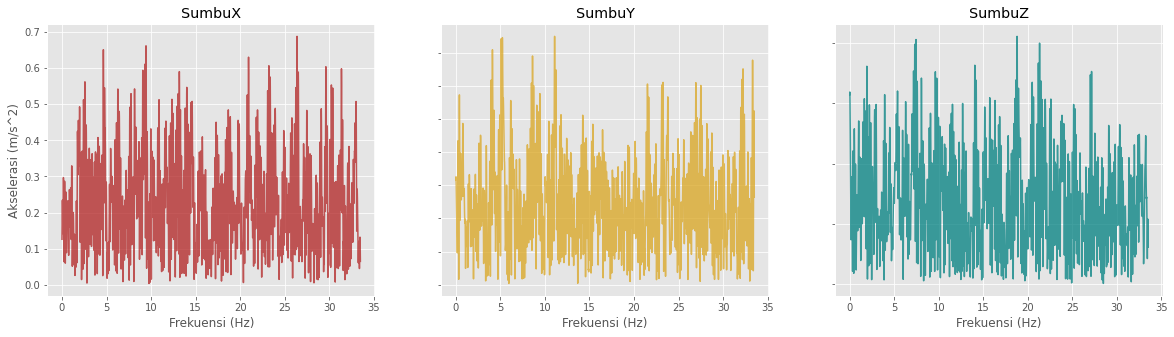

In [127]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(xf_sumbuX, np.abs(x_ybpf), color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(xf_sumbuY, np.abs(y_ybpf), color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(xf_sumbuZ, np.abs(z_ybpf), color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Frekuensi (Hz)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()